<h1 style="font-size:35px;
        color:black;
        ">Lab 1 Quantum Circuits</h1>

Prerequisite
- [Qiskit basics](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html)
- [Ch.1.2 The Atoms of Computation](https://qiskit.org/textbook/ch-states/atoms-computation.html)

Other relevant materials
- [Access IBM Quantum Systems](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems)
- [IBM Quantum Systems Configuration](https://quantum-computing.ibm.com/docs/manage/backends/configuration)
- [Transpile](https://qiskit.org/documentation/apidoc/transpiler.html)
- [IBM Quantum account](https://quantum-computing.ibm.com/docs/manage/account/ibmq)
- [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html)  

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

<h2 style="font-size:24px;">Part 1: Classical logic gates with quantum circuits</h2>

<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Create quantum circuit functions that can compute the XOR, AND, NAND and OR gates using the NOT gate (expressed as x in Qiskit), the CNOT gate (expressed as cx in Qiskit) and the Toffoli gate (expressed as ccx in Qiskit) .</p>
</div>

An implementation of the `NOT` gate is provided as an example.

In [2]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw('mpl')
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

NOT with input 0 gives output 1


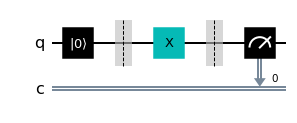



NOT with input 1 gives output 0


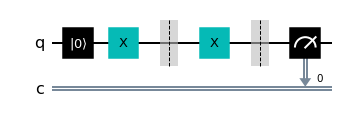

In [3]:
## Test the function
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw())
    print('\n')

<h3 style="font-size: 20px">&#128211; XOR gate</h3>

Takes two binary strings as input and gives one as output.

The output is '0' when the inputs are equal and  '1' otherwise.

In [4]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where your program for quantum XOR gate goes
    
    
    
    
    
    
    
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

XOR with inputs 0 0 gives output 0


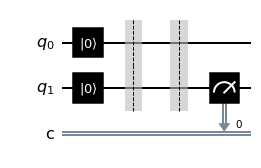



XOR with inputs 0 1 gives output 1


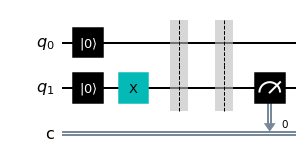



XOR with inputs 1 0 gives output 0


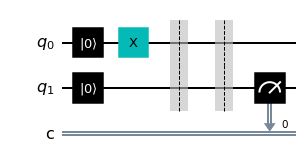



XOR with inputs 1 1 gives output 1


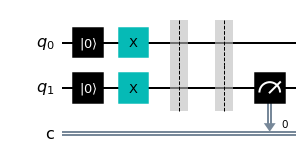

In [5]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('XOR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h3 style="font-size: 20px">&#128211; AND gate</h3>

Takes two binary strings as input and gives one as output.

The output is `'1'` only when both the inputs are `'1'`.

In [6]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes

    
    
    
    
    

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

AND with inputs 0 0 gives output 0


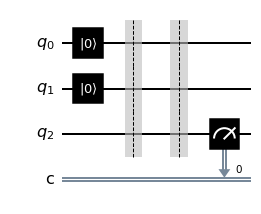



AND with inputs 0 1 gives output 0


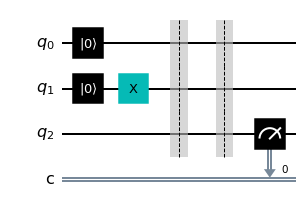



AND with inputs 1 0 gives output 0


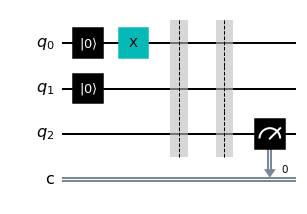



AND with inputs 1 1 gives output 0


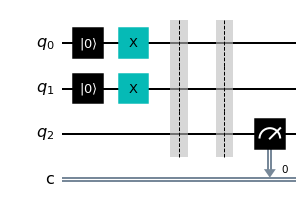

In [7]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h3 style="font-size: 20px">&#128211; NAND gate</h3>

Takes two binary strings as input and gives one as output.

The output is `'0'` only when both the inputs are `'1'`.

In [8]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    # this is where your program for quantum NAND gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

NAND with inputs 0 0 gives output 0


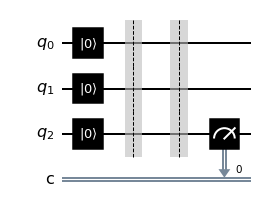



NAND with inputs 0 1 gives output 0


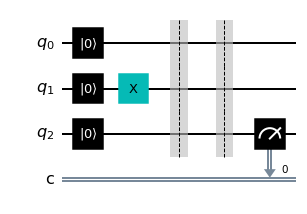



NAND with inputs 1 0 gives output 0


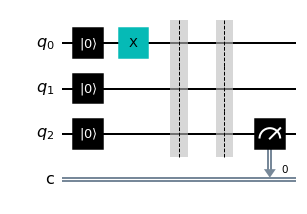



NAND with inputs 1 1 gives output 0


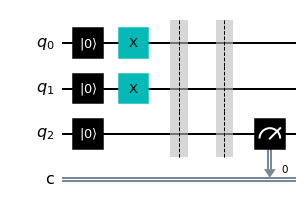

In [9]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

<h3 style="font-size: 20px">&#128211; OR gate</h3>

Takes two binary strings as input and gives one as output.

The output is '1' if either input is '1'.

In [10]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

OR with inputs 0 0 gives output 0


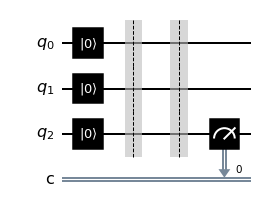



OR with inputs 0 1 gives output 0


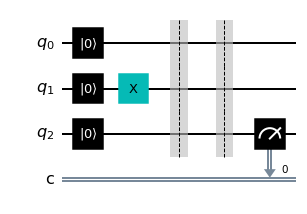



OR with inputs 1 0 gives output 0


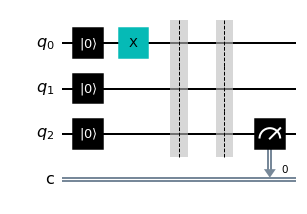



OR with inputs 1 1 gives output 0


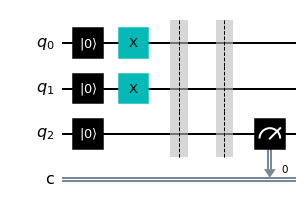

In [11]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

## **Task 1**

Find the circuits required above for the
* (a) `AND`gate.
* (b) `NAND`gate.
* (c) `OR`gate.

<h2 style="font-size:24px;">Part 2: AND gate on Quantum Computer</h2>
<br>
<div style="background: #E8E7EB; border-radius: 5px;
-moz-border-radius: 5px;">
  <p style="background: #800080;
            border-radius: 5px 5px 0px 0px;
            padding: 10px 0px 10px 10px;
            font-size:18px;
            color:white;
            "><b>Goal</b></p>
    <p style=" padding: 0px 0px 10px 10px;
              font-size:16px;">Execute AND gate on two quantum systems and learn how the different circuit properties affect the result.</p>
</div>

In Part 1 you made an `AND` gate from quantum gates, and executed it on the simulator.  Here in Part 2 you will do it again, but instead run the circuits on simulations of a real quantum computer.  When using a real quantum system, one thing you should keep in mind is that present day quantum computers are not fault tolerent; they are noisy.

The 'noise' in a quantum system is the collective effects of all the things that should not happen, but nevertheless do. Noise results in outputs are not always what we would expect. There is noise associated with all processes in a quantum circuit: preparing the initial state, applying gates, and qubit measurement.  For the gates, noise levels can vary between different gates and between different qubits. `cx` gates are typically more noisy than any single qubit gate.

<h3 style="font-size: 20px">Step 1. Choosing a device</h3>

To make sure you don't end up in a queue for a busy device, we'll be using mock backends. These are designed to act exactly like real backends (including noise).

In [2]:
from qiskit.test.mock import FakeYorktown, FakeAthens
backend1 = FakeYorktown()
backend2 = FakeAthens()

Upon executing the following cell you will be presented with a widget that displays all of the information about your choice of the backend.  You can obtain information that you need by clicking on the tabs. For example, backend status, number of qubits and the connectivity are under `configuration` tab, where as the `Error Map` tab will reveal the latest noise information for the system. 

In [3]:
import qiskit.tools.jupyter

backend1

<FakeYorktown('fake_yorktown') from None()>

The two systems we are using (or at least pretending to) are `ibmq_athens` for its low error rates, and `ibmqx2` (also known as `ibmq_yorktown`) for its additional connectivity, in particular is triganular connectivity, that will be useful for circuits with Toffoli gates.

<h3 style="font-size: 20px">Step 2. Define AND function for a real device</h3>

We now define the AND function.  We choose 8192 as the the number of shots, the maximum number of shots for open IBM systems, to reduce the variance in the final result. Related informations is well explained [here](https://quantum-computing.ibm.com/docs/manage/backends/configuration)

<h4 style="font-size: 16px">Qiskit Transpiler</h4>

It is important to know that when running a circuit on a real quantum computer, cicruits typically need to be transpiled for the backend that you select so that the circuit contains only those gates that the quantum computer can actually perform. Primarily this involves the addition of swap gates so that two-qubit gates in the circuit map to those pairs of qubits on the device that can actually perform these gates. The following cell shows the AND gate represented as a Toffoli gate decomposed into single- and two-qubit gates, which are the only types of gate that can be run on IBM hardware.  Provided that CNOT gates can be performed between all three qubits, a triangle topology, no other gates are required.

AND gate


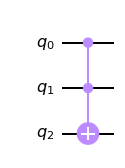



Transpiled AND gate with all the reqiured connectiviy


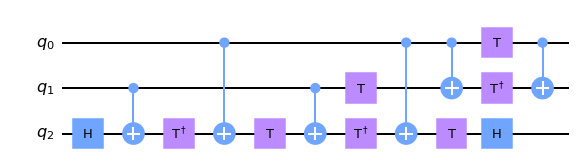

In [4]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate with all the reqiured connectiviy')
qc_and.decompose().draw()

In addition, there are often optimizations that the transpiler can perform that reduce the overall gate count, and thus total length of the input circuits.  Note that the addition of swaps to match the device topology, and optimizations for reducing the length of a circuit are at odds with each other. In what follows we will make use of `initial_layout` that allows us to pick the qubits on a device used for the computation and `optimization_level`, an argument that allows selecting from internal defaults for circuit swap mapping and optimization methods to perform.

You can learn more about transpile function in depth [here](https://qiskit.org/documentation/apidoc/transpiler.html).

Rather than actually running the AND function, let's just look at the transpiled circuits. The following function does this for a given set of inputs.

In [64]:
# run the cell to define AND gate for real quantum system

def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    
    return qc_trans

When you submit jobs to quantum systems, `job_monitor` will start tracking where your submitted job is in the pipeline.

<h4 style="font-size: 16px">Case A) Three qubits on <code>ibmqx2</code> with the triangle connectivity</h4>
 
First, examine `ibmqx2` using the widget introduced earlier. Find a group of three qubits with triangle conntection and determine your initial layout.

In [17]:
# run this cell for the widget
backend1

<FakeYorktown('fake_yorktown') from None()>

<p>&#128211; Assign your choice of layout to the list variable <code>layout1</code> in the cell below</p>

In [33]:
# Assign your choice of the initial_layout to the variable layout1 as a list 
# ex) layout1 = [0,2,4]
layout1 = 

<p>&#128211; Describe the reason for your choice of initial layout.</p>

Compile the `AND` gate on `ibmqx2` by running the cell below.

In [65]:
output1_all = []
qc_trans1_all = []
prob1_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans1 = AND(input1, input2, backend1, layout1)
        
        qc_trans1_all.append(qc_trans1)

<h4 style="font-size: 16px">Case B) Three qubits on <code>ibmq_athens</code> for the linear nearest neighbor connectivity</h4>
 
Examine `ibmq_athens` through the widget by running the cell below.

In [66]:
backend2

<FakeAthens('fake_athens') from None()>

<p>&#128211; Find three qubits with the linear nearest neighbor connectivity. Determine the initial layout considering the error map and assign it to the list variable layout2.</p>

In [83]:
layout2 = 

<p>&#128211; Describe the reason for choice of initial layout.</p>

Execute `AND` gate on `ibmq_athens` by running the cell below.

In [84]:
output2_all = []
qc_trans2_all = []
prob2_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans2 = AND(input1, input2, backend2, layout2)
        
        qc_trans2_all.append(qc_trans2)

<h3 style="font-size: 20px">Step 3. Interpret the result</h3>

There are several quantities that distinguish the circuits.  Chief among them is the  **circuit depth**.  Circuit depth is defined in detail [here](https://qiskit.org/documentation/apidoc/circuit.html) (See the Supplementray Information and click the Quantum Circuit Properties tab). Circuit depth is proportional to the number of gates in a circuit, and loosly corresponds to the runtime of the circuit on hardware.   Therefore, circuit depth is an easy to compute metric that can be used to estimate the fidelity of an executed circuit.

A second important value is the number of **nonlocal** (multi-qubit) **gates** in a circuit.  On IBM Quantum systems, the only nonlocal gate that can physically be performed is the CNOT gate.  Recall that CNOT gates are the most expensive gates to perform, and thus the total number of these gates also serves as a good benchmark for the accuracy of the final output.

<h4 style="font-size: 16px">A) Circuit depth and result accuracy</h4>

Running the cells below will display the four transpiled AND gate circuit diagrams with the corresponding inputs that executed on `ibmq_athens` and their circuit depths with the success probability for producing correct answer.

Transpiled AND gate circuit for ibmq_athens with input 0 0

The circuit depth : 20
# of nonlocal gates : 11


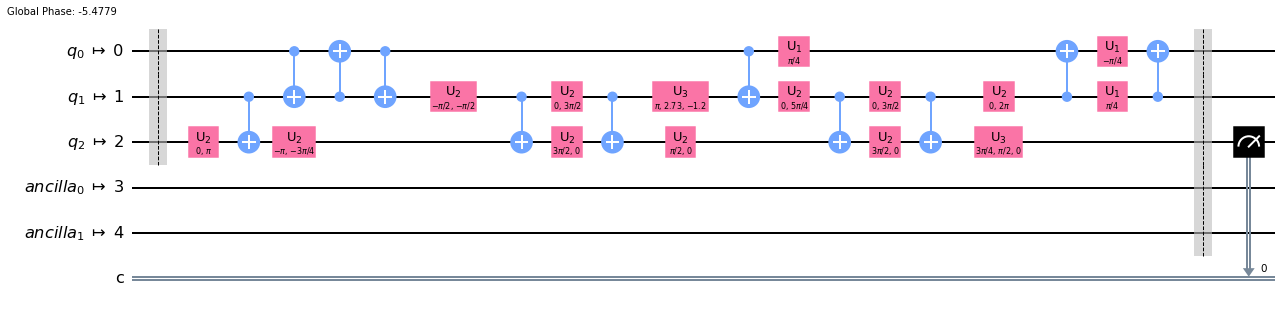

In [85]:
print('Transpiled AND gate circuit for ibmq_athens with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans2_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[0].num_nonlocal_gates()))
qc_trans2_all[0].draw()

Transpiled AND gate circuit for ibmq_athens with input 0 1

The circuit depth : 18
# of nonlocal gates : 10


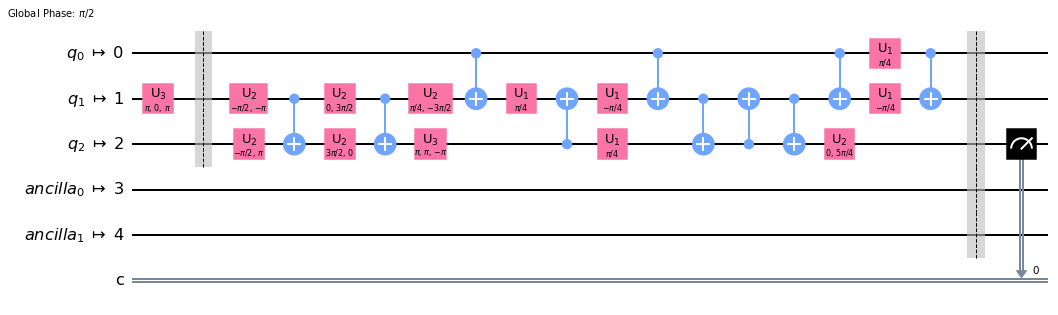

In [86]:
print('Transpiled AND gate circuit for ibmq_athens with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans2_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[1].num_nonlocal_gates()))
qc_trans2_all[1].draw()

Transpiled AND gate circuit for ibmq_athens with input 1 0

The circuit depth : 18
# of nonlocal gates : 10


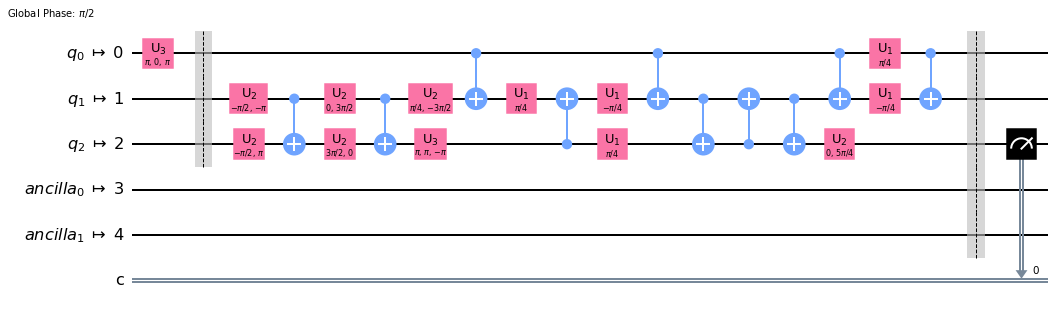

In [87]:
print('Transpiled AND gate circuit for ibmq_athens with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans2_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[2].num_nonlocal_gates()))
qc_trans2_all[2].draw()

Transpiled AND gate circuit for ibmq_athens with input 1 1

The circuit depth : 18
# of nonlocal gates : 10


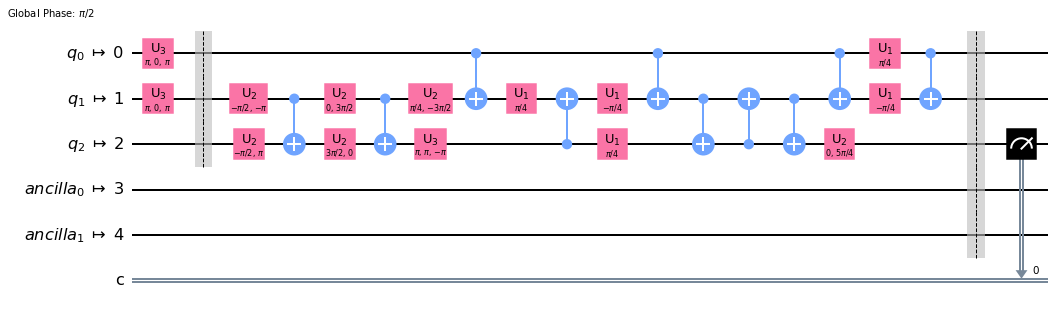

In [88]:
print('Transpiled AND gate circuit for ibmq_athens with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans2_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans2_all[3].num_nonlocal_gates()))
qc_trans2_all[3].draw()

<p>&#128211; Explain reason for the disimmilarity of the circuits.  Descibe the relations between the property of the circuit and the accuracy of the outcomes.</p>

<h4 style="font-size: 16px">B) Qubit connectivity and circuit depth</h4>

Investigate the transpiled circuits for `ibmqx2` by running the cells below.

Transpiled AND gate circuit for ibmqx2 with input 0 0

The circuit depth : 12
# of nonlocal gates : 6


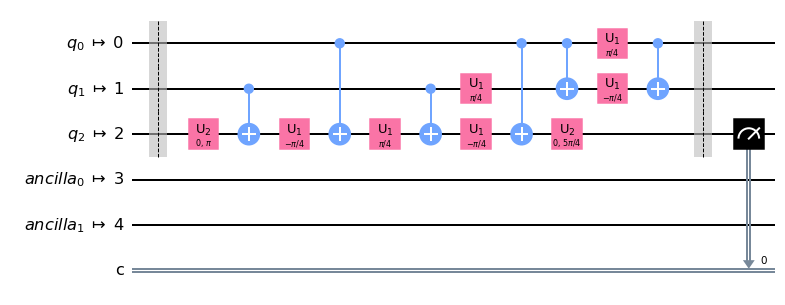

In [73]:
print('Transpiled AND gate circuit for ibmqx2 with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans1_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[0].num_nonlocal_gates()))
qc_trans1_all[0].draw()

Transpiled AND gate circuit for ibmqx2 with input 0 1

The circuit depth : 13
# of nonlocal gates : 6


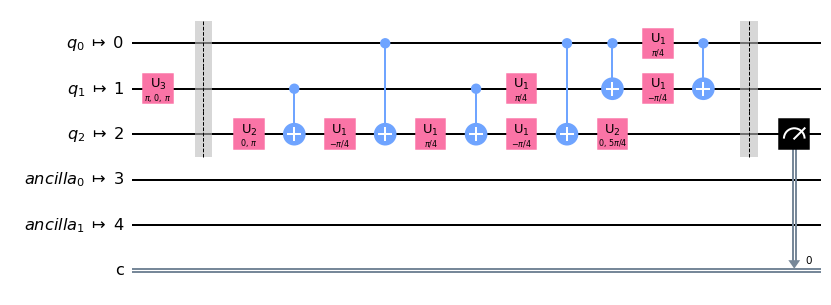

In [74]:
print('Transpiled AND gate circuit for ibmqx2 with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans1_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[1].num_nonlocal_gates()))
qc_trans1_all[1].draw()

Transpiled AND gate circuit for ibmqx2 with input 1 0

The circuit depth : 13
# of nonlocal gates : 6


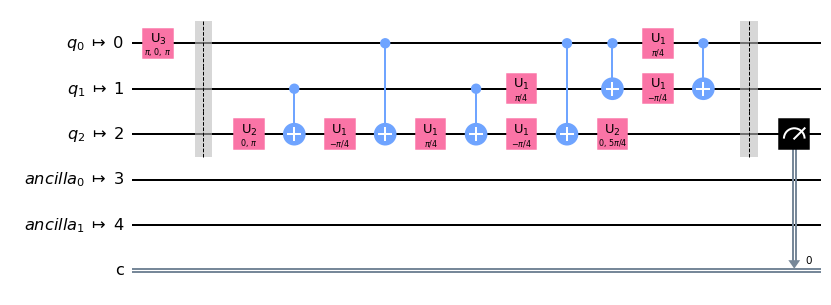

In [75]:
print('Transpiled AND gate circuit for ibmqx2 with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans1_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[2].num_nonlocal_gates()))
qc_trans1_all[2].draw()

Transpiled AND gate circuit for ibmqx2 with input 1 1

The circuit depth : 13
# of nonlocal gates : 6


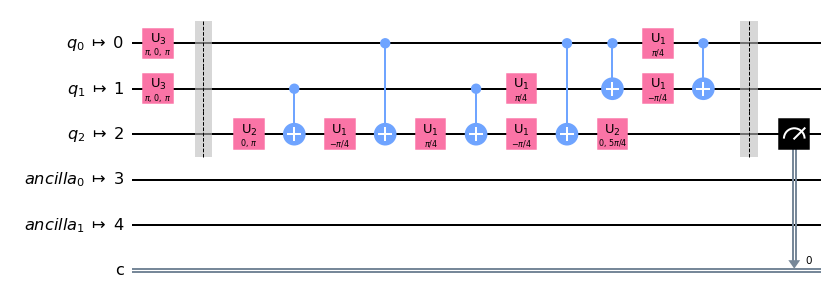

In [76]:
print('Transpiled AND gate circuit for ibmqx2 with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans1_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans1_all[3].num_nonlocal_gates()))
qc_trans1_all[3].draw()

## **Task 2**

- (a) Find a `layout1` for which the AND gate compiles to 6 non-local gates for `ibmqx2`.
- (b) Find a `layout2` for which the AND gate compiles to 10 or less non-local gates for `ibmq_athens`.
- (c) Find a `layout2` for which the AND gate compiles to 20 or more non-local gates for `ibmq_athens`.

Note that there is some randomness in the compiling process. So you might need to try a few times.

